#Library Imports




In [ ]:
!pip install pyspark

In [ ]:
!unzip AdharDataset.zip

Archive:  AdharDataset.zip
  inflating: AdharDataset.csv        


In [ ]:
import pyspark
from pyspark import SparkContext, SQLContext
sc = pyspark.SparkContext(appName="AdharDataAnalysis")

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession(sc)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
plt.style.use("seaborn-pastel")

#Dataset Loading


In [ ]:
dataset_load = sc.textFile('AdharDataset.csv')
header = dataset_load.first()
dataset = dataset_load.filter(lambda x: header not in x)

#Implementation

In [ ]:
data = pd.read_csv("AdharDataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575127 entries, 0 to 575126
Data columns (total 35 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Unnamed: 0                                     575127 non-null  int64  
 1   hh_id                                          575127 non-null  int64  
 2   country                                        575127 non-null  object 
 3   state                                          575127 non-null  object 
 4   district_name                                  575127 non-null  object 
 5   region_type                                    575127 non-null  object 
 6   state_of_origin                                575127 non-null  object 
 7   town_village                                   575127 non-null  object 
 8   gender                                         575127 non-null  object 
 9   literacy                             

##List Different states and their count

In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[3],1))

In [ ]:
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)

In [ ]:
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])

In [ ]:
rdd = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + " - " + str(s[1])).collect()

In [ ]:
for state in rdd:
  print(state)

Uttar Pradesh - 91929
Maharashtra - 64245
Rajasthan - 38471
Bihar - 35532
Gujarat - 33815
West Bengal - 33192
Madhya Pradesh - 30611
Tamil Nadu - 29034
Karnataka - 27780
Punjab - 22018
Odisha - 21472
Haryana - 19479
Andhra Pradesh - 19154
Chhattisgarh - 16750
Jharkhand - 16245
Telangana - 15048
Kerala - 14060
Jammu and Kashmir - 6652
Delhi - 6189
Uttarakhand - 6122
Meghalaya - 5292
Assam - 4870
Himachal Pradesh - 4806
Tripura - 3579
Puducherry - 3372
Goa - 2356
Chandigarh - 1529
Sikkim - 1525


In [ ]:
state=[]
val=[]
for datas in rdd:
  a,b = datas.split(' - ')
  state.append(a)
  val.append(int(b))

([<matplotlib.patches.Wedge at 0x7f09394c6cd0>,
 [Text(1.542722497359467, 0.8471170498466963, 'Uttar Pradesh'),
  Text(0.37643761516430796, 1.7192715672311367, 'Maharashtra'),
  Text(-0.5961022230411883, 1.6559776990301995, 'Rajasthan'),
  Text(-1.1993820877913026, 1.288053806129766, 'Bihar'),
  Text(-1.5906890666087685, 0.7531987077599944, 'Gujarat'),
  Text(-1.7548919552147781, 0.1339933786515381, 'West Bengal'),
  Text(-1.6951462868458897, -0.47336990418972863, 'Madhya Pradesh'),
  Text(-1.454456343157191, -0.9910382161399288, 'Tamil Nadu'),
  Text(-1.082327336453767, -1.3878643798170247, 'Karnataka'),
  Text(-0.6696449647988867, -1.6276288339543197, 'Punjab'),
  Text(-0.2678030226683592, -1.739506119865547, 'Odisha'),
  Text(0.12474604619037453, -1.7555735313452039, 'Haryana'),
  Text(0.48971393030068405, -1.6904970471637795, 'Andhra Pradesh'),
  Text(0.8097501519452377, -1.5626594931157156, 'Chhattisgarh'),
  Text(1.0767542190683959, -1.3921926417412247, 'Jharkhand'),
  Text(1.297

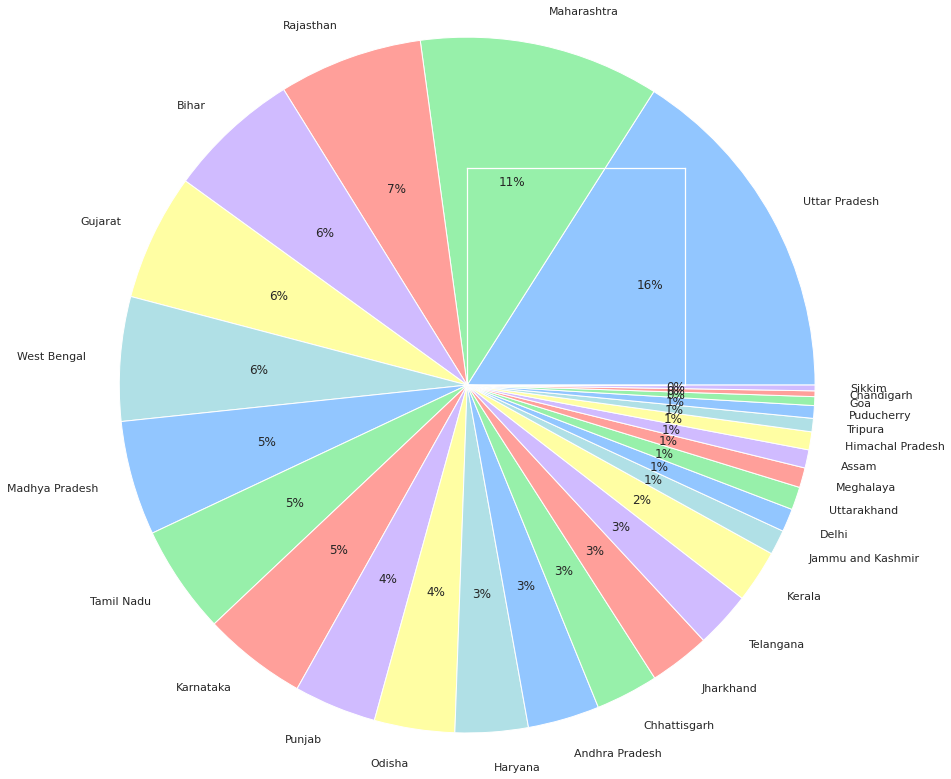

In [ ]:
plt.figure(20.8)
plt.pie(val, labels = state, autopct='%.0f%%',radius=1.6, frame=True)

##Count people having adhar occupationwise 

In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[10],1) if s.split(",")[13]=="Yes" else (s.split(",")[10],0))


In [ ]:
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)


In [ ]:
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])

In [ ]:
rdd = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + "," + str(s[1])).collect()

In [ ]:
for occupation in rdd:
  print(occupation)

Home Maker,158695
Student,149469
Retired/Aged,37358
Wage Labourer,33862
Self Employed Entrepreneur,31319
Small Farmer,17031
Businessman,15428
Organised Farmer,13179
White-Collar Professional Employees and Other Employees,12563
Industrial Workers,11737
Support Staff,11297
Agricultural Labourer,9956
Non-Industrial Technical Employee,8019
White Collar Clerical Employees,8010
NonSchooling Child,7477
Unoccupied,6529
Small Trader/Hawker/ Businessman without Fixed Premises,4740
Home-based Worker,1900
Qualified Self Employed Professionals,1019
Manager,450
Legislator/Social Worker/ Activists,104
White collar worker,1


In [ ]:
occ=[]
val=[]
for datas in rdd:
  a,b = datas.split(',')
  occ.append(a)
  val.append(int(b))
values = pd.DataFrame(val)

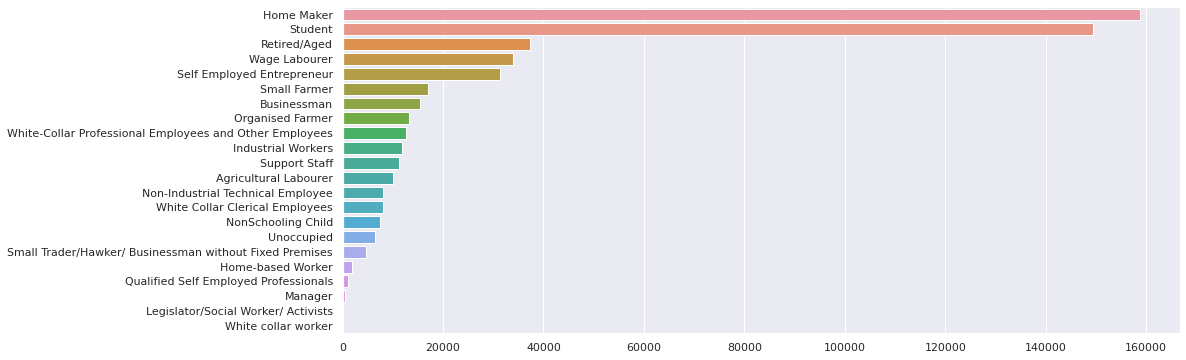

In [ ]:

plt.figure(figsize=(15,6))
sns.barplot(x=val,y=occ,orient="h")
plt.show()

##Count number of literate people who lost their adhar card

In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[9],1) if s.split(",")[13]=="I Lost it" else (s.split(",")[9],0))
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])
rdd = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + "," + str(s[1])).collect()

In [ ]:
for cnt in rdd:
  print(cnt)

Y,107
N,2


In [ ]:
ans=[]
val=[]
for datas in rdd:
  a,b = datas.split(',')
  ans.append(a)
  val.append(int(b))


([<matplotlib.patches.Wedge at 0x7f0938ef1450>,
 [Text(-1.098172953242674, 0.06337321805198015, 'Y'),
  Text(1.0981729510176375, -0.06337325660886996, 'N')],
 [Text(-0.5990034290414585, 0.03456720984653462, '98%'),
  Text(0.5990034278278022, -0.03456723087756543, '2%')])

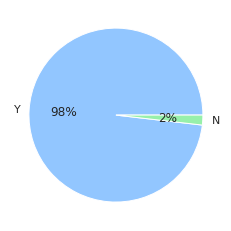

In [ ]:
plt.pie(val, labels = ans, autopct='%.0f%%')

##How Adhar data is used and Incorrect Adhar data Analysis


In [ ]:

sqlContext = SQLContext(sc)
df = sqlContext.read.csv("AdharDataset.csv", header=True)
df.show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+---+--------+-------+-----------------+-------------+-----------+-----------------+------------+------+--------+--------------------+--------------+-----------------+-----------+--------------+--------------+--------------+---------------+--------------+--------------+-----------------------------+-----------------+----------------------+--------------+--------------+--------------+-------------------+-------------------+--------------------+--------------+---------------------------------------------+--------------+------------+-----------------+----------------+
|_c0|   hh_id|country|            state|district_name|region_type|  state_of_origin|town_village|gender|literacy|          occupation|     education|employment_status|has_aadhaar|  correct_name|   correct_dob|correct_gender|correct_address| correct_photo|correct_mobile|used_other_employment_schemes|used_scholarships|used_open_bank_account|used_insurance|used_debt_loan|used_sim_phone|used_school_college|used_get_another_id|us

In [ ]:
df.registerTempTable("AadharTable")

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:140: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  FutureWarning


In [ ]:
data.columns

Index(['Unnamed: 0', 'hh_id', 'country', 'state', 'district_name',
       'region_type', 'state_of_origin', 'town_village', 'gender', 'literacy',
       'occupation', 'education', 'employment_status', 'has_aadhaar',
       'correct_name', 'correct_dob', 'correct_gender', 'correct_address',
       'correct_photo', 'correct_mobile', 'used_other_employment_schemes',
       'used_scholarships', 'used_open_bank_account', 'used_insurance',
       'used_debt_loan', 'used_sim_phone', 'used_school_college',
       'used_get_another_id', 'used_job_application', 'used_age_proof',
       'used_land_vehicle_house_marriage_registration', 'cal_age_in_yrs',
       'cal_age_type', 'cal_education_yrs', 'cal_correct_card'],
      dtype='object')

In [ ]:
used_school_college = sqlContext.sql("""Select count(used_school_college) as Total_Entries, 
count(used_school_college)*100/(Select count(*) from AadharTable) as Percent from AadharTable where used_school_college='Yes'""");
used_school_college.show()

+-------------+------------------+
|Total_Entries|           Percent|
+-------------+------------------+
|        93680|16.288576262286416|
+-------------+------------------+



In [ ]:
used_insurance = sqlContext.sql("""Select count(used_insurance) as Total_Entries, 
count(used_insurance)*100/(Select count(*) from AadharTable) as Percent from AadharTable where used_insurance='Yes'""");
used_insurance.show()

+-------------+------------------+
|Total_Entries|           Percent|
+-------------+------------------+
|       119039|20.697863254550732|
+-------------+------------------+



In [ ]:
used_sim_phone = sqlContext.sql("""Select count(used_sim_phone) as Total_Entries, 
count(used_sim_phone)*100/(Select count(*) from AadharTable) as Percent from AadharTable where used_sim_phone='Yes'""");
used_sim_phone.show()

+-------------+----------------+
|Total_Entries|         Percent|
+-------------+----------------+
|       307751|53.5100942922172|
+-------------+----------------+



In [ ]:
used_get_another_id = sqlContext.sql("""Select count(used_get_another_id) as Total_Entries, 
count(used_get_another_id)*100/(Select count(*) from AadharTable) as Percent from AadharTable where used_get_another_id='Yes'""");
used_get_another_id.show()

+-------------+----------------+
|Total_Entries|         Percent|
+-------------+----------------+
|       200931|34.9368052621421|
+-------------+----------------+



In [ ]:
used_age_proof = sqlContext.sql("""Select count(used_age_proof) as Total_Entries, 
count(used_age_proof)*100/(Select count(*) from AadharTable) as Percent from AadharTable where used_age_proof='Yes'""");
used_age_proof.show()

+-------------+-----------------+
|Total_Entries|          Percent|
+-------------+-----------------+
|       234163|40.71500729404114|
+-------------+-----------------+



In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[14],1) if s.split(",")[14]=="No" else (s.split(",")[14],0))
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])
rdd1 = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + "," + str(s[1])).collect()
print(rdd1)

['No,84447', 'Yes,0', 'Not Applicable,0']


In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[15],1) if s.split(",")[15]=="No" else (s.split(",")[15],0))
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])
rdd2 = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + "," + str(s[1])).collect()
print(rdd2)

['No,14393', 'Yes,0', 'Not Applicable,0']


In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[16],1) if s.split(",")[16]=="No" else (s.split(",")[16],0))
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])
rdd3 = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + "," + str(s[1])).collect()
print(rdd3)

['No,2008', 'Yes,0', 'Not Applicable,0']


In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[17],1) if s.split(",")[17]=="No" else (s.split(",")[17],0))
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])
rdd4 = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + "," + str(s[1])).collect()
print(rdd4)

['No,3131', 'Yes,0', 'Not Applicable,0']


In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[18],1) if s.split(",")[18]=="No" else (s.split(",")[18],0))
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])
rdd5 = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + "," + str(s[1])).collect()
print(rdd5)

['No,2975', 'Yes,0', 'Not Applicable,0']


In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[19],1) if s.split(",")[19]=="No" else (s.split(",")[19],0))
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])
rdd6 = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + "," + str(s[1])).collect()
print(rdd6)

['No,84447', 'Yes,0', 'Not Applicable,0']


In [ ]:
val=[]
a,b = rdd1[0].split(',')
val.append(b)
a,b = rdd2[0].split(',')
val.append(b)
a,b = rdd3[0].split(',')
val.append(b)
a,b = rdd4[0].split(',')
val.append(b)
a,b = rdd5[0].split(',')
val.append(b)
a,b = rdd6[0].split(',')
val.append(b)

In [ ]:
col = ["No_correct_Name","No_correct_dob","No_correct_gender","no_correct_address","no_correct_photo","no_correct_mobile"]

([<matplotlib.patches.Wedge at 0x7f0938eb2ad0>,
 [Text(0.6060869745038411, 3.243864759717455, 'No_correct_Name'),
  Text(-3.2707770642759, 0.43819789571234435, 'No_correct_dob'),
  Text(-3.269519668085663, -0.4474831170010978, 'No_correct_gender'),
  Text(-3.2201950261650962, -0.7213487322104186, 'no_correct_address'),
  Text(-3.1318621082164957, -1.039922946721405, 'no_correct_photo'),
  Text(0.606086424024858, -3.2438648625694566, 'no_correct_mobile')],
 [Text(0.33059289518391327, 1.7693807780277024, '44%'),
  Text(-1.7840602168777633, 0.23901703402491506, '8%'),
  Text(-1.7833743644103612, -0.24408170018241693, '1%'),
  Text(-1.7564700142718703, -0.3934629448420464, '2%'),
  Text(-1.7082884226635426, -0.5672306982116754, '2%'),
  Text(0.33059259492264975, -1.7693808341287942, '44%')])

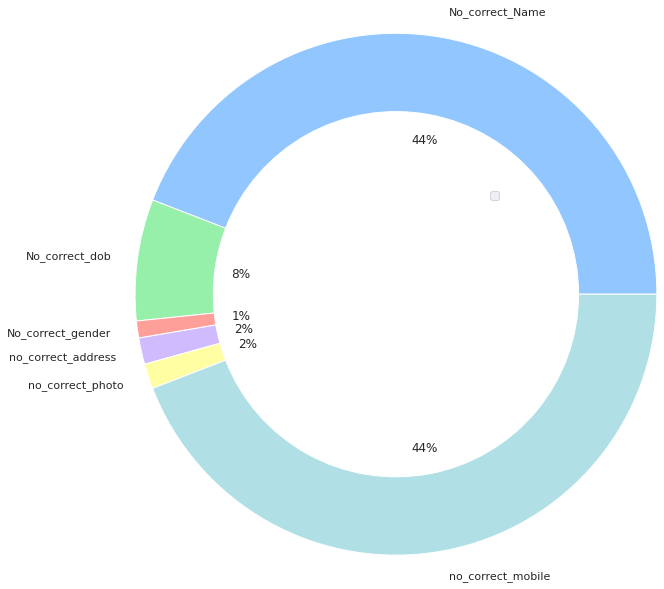

In [ ]:
plt.legend("Adhar details are not correct")
plt.pie(val, labels = col, autopct='%.0f%%',radius=3, wedgeprops=dict(width=0.9))

##Age group analysis


In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[32],1) if s.split(",")[13]=="Yes" else (s.split(",")[32],0))
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])
rdd = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + "," + str(s[1])).collect()

In [ ]:
print(rdd)

['adult,434860', 'Teen,98347', 'Child,6936']


In [ ]:
col = []
val = []
for datas in rdd:
  a,b = datas.split(',')
  col.append(a)
  val.append(int(b))

([<matplotlib.patches.Wedge at 0x7f0938eee0d0>,
 [Text(-2.70038932974046, 1.8968124493011609, 'adult'),
  Text(2.6216930957177675, -2.004176966204778, 'Teen'),
  Text(3.29731511486676, -0.13309031997560522, 'Child')],
 [Text(-1.4729396344038872, 1.0346249723460876, '81%'),
  Text(1.4300144158460548, -1.093187436111697, '18%'),
  Text(1.7985355172000503, -0.07259471998669374, '1%')])

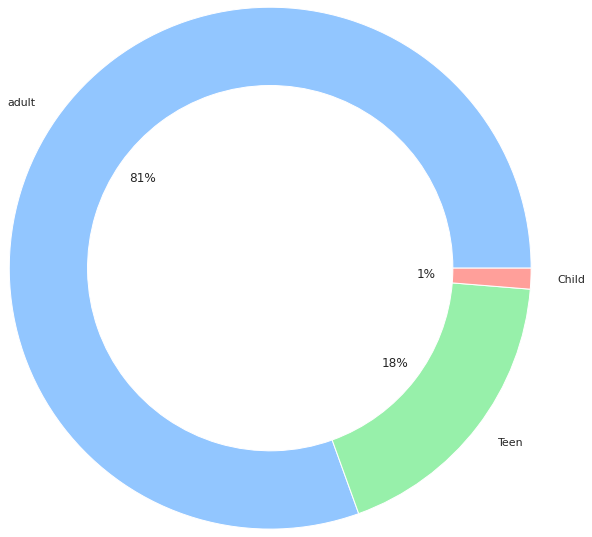

In [ ]:
plt.pie(val, labels = col, autopct='%.0f%%',radius=3, wedgeprops=dict(width=0.9))

##Gender wise Analysis

In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[13],1) if s.split(",")[8]=="F" else (s.split(",")[13],0))
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])
rdd = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + "," + str(s[1])).collect()

In [ ]:
print(rdd)

['Yes,253618', 'No,16576', 'I Lost it,59']


In [ ]:
col = []
val = []
for datas in rdd:
  a,b = datas.split(',')
  col.append(a)
  val.append(int(b))

([<matplotlib.patches.Wedge at 0x7f0938d7c5d0>,
 [Text(-3.2384916207361703, 0.6341703418022754, 'Yes'),
  Text(3.2380559424520103, -0.6363911639481057, 'No'),
  Text(3.2999992240709326, -0.0022629916578995163, 'I Lost it')],
 [Text(-1.7664499749470015, 0.3459110955285138, '94%'),
  Text(1.7662123322465508, -0.34712245306260303, '6%'),
  Text(1.7999995767659631, -0.0012343590861270087, '0%')])

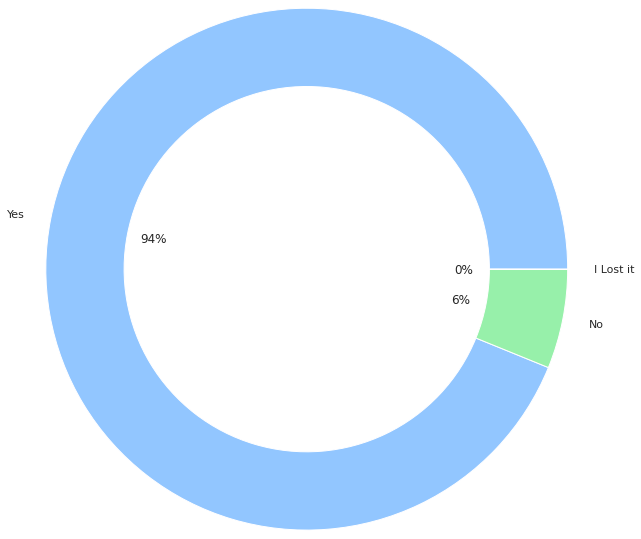

In [ ]:
plt.pie(val, labels = col, autopct='%.0f%%',radius=3, wedgeprops=dict(width=0.9))

In [ ]:
datasetMap = dataset.map(lambda s : (s.split(",")[13],1) if s.split(",")[8]=="M" else (s.split(",")[13],0))
datasetMap_type = datasetMap.reduceByKey(lambda s,t : s+t)
datasetMap_typeSorted = datasetMap_type.takeOrdered(datasetMap_type.count(),lambda s:-s[1])
rdd = sc.parallelize(datasetMap_typeSorted).map(lambda s : s[0] + "," + str(s[1])).collect()

In [ ]:
print(rdd)

['Yes,286525', 'No,18299', 'I Lost it,50']


In [ ]:
col = []
val = []
for datas in rdd:
  a,b = datas.split(',')
  col.append(a)
  val.append(int(b))

([<matplotlib.patches.Wedge at 0x7f0938d52c90>,
 [Text(-3.241187034630795, 0.6202472140535852, 'Yes'),
  Text(3.2408670866328477, -0.6219168166080737, 'No'),
  Text(3.2999995622696496, -0.0016997117760988152, 'I Lost it')],
 [Text(-1.7679202007077062, 0.3383166622110464, '94%'),
  Text(1.7677456836179166, -0.33922735451349467, '6%'),
  Text(1.7999997612379905, -0.0009271155142357172, '0%')])

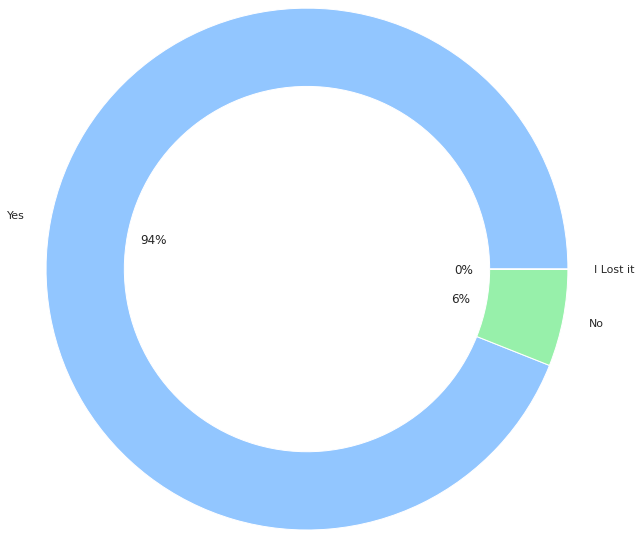

In [ ]:
plt.pie(val, labels = col, autopct='%.0f%%',radius=3, wedgeprops=dict(width=0.9))